In [ ]:
# %pip install pandas seaborn

In [1]:
import pandas as pd
import seaborn as sns

# Pandas and DataFrames

Often, we have tables of data--collections of named columns arranged in rows.  The **Pandas** package gives us a **DataFrame()** class that lets us index these columns the same way as with dicts, while still getting the benefit of Numpy arrays, meaning we can still write vectorized code.  

Let's start playing with the analysis now.  We'll examine Pandas in more depth in the coming days.

## Today's Dataset: Mental Rotation Psychology Experiment

![Mental Rotation Task Example](http://mercercognitivepsychology.pbworks.com/f/1353970952/mental-rotation-image.gif)

## Loading the Data

Please open the file “MentalRotation.csv” found at the url below (pd.read_csv()) and use it to answer the following questions about the results of the Mental Rotation psychology experiment. If you reach the end of the exercises, explore the dataset and DataFrames more and see what you can find about this experiment!

In [2]:
url = "https://raw.githubusercontent.com/nickdelgrosso/CodeTeachingMaterials/main/datasets/MentalRotation.csv"

In [3]:
df = pd.read_csv(url)
df

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M
...,...,...,...,...,...,...,...,...,...
5066,33,92,150,1,b,2095,1,20,F
5067,33,93,150,0,n,2125,1,20,F
5068,33,94,50,0,n,1226,1,20,F
5069,33,95,100,1,b,2783,1,20,F


## Examining the Dataset

| With Slicing | With Method | With Function |
| :-- | :-- | :-- |
| `df[:5]` | `df.head()` |   |
| `df[-5:]` | `df.tail()` |  |
|  | `df.sample(5)` |   | 
|  | `df.info()` |   |
|  | `df.describe()` |   |
|  | `df.shape[0]` | `len(df)` |

Print the first 5 lines of the dataset:

In [4]:
df.head(5)

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


Look at the last 5 lines of the dataset

In [5]:
df.tail(5)

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
5066,33,92,150,1,b,2095,1,20,F
5067,33,93,150,0,n,2125,1,20,F
5068,33,94,50,0,n,1226,1,20,F
5069,33,95,100,1,b,2783,1,20,F
5070,33,96,0,0,n,1017,1,20,F


Check 3 random lines in the dataset.

In [6]:
df.sample(3)

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
4708,27,20,50,1,b,2094,1,19,M
1118,28,79,50,0,n,1236,1,19,F
4666,46,73,100,1,b,2137,1,19,F


How Many Total Trials (rows) are in the study?

In [7]:
len(df), len(df.Trial)

(5071, 5071)

## Calculating Values on Columns

| Method | Example |
| :-- | :-- |
| `.max()` | `df['Height'].max()` |
| `.min()` | `df['Weight'].min()` |
| `.mean()` | `df['Time'].mean()` |
| `.median()` | `df['Speed'].median()` |
| `.value_counts()` | `df['Kind'].value_counts()` |


What is the maximum number of trials that one subject performed?

In [8]:
df.groupby('Subject')['Trial'].max()

Subject
1     96
2     96
3     96
4     96
5     96
6     96
7     96
8     96
9     96
10    96
11    96
12    96
13    96
14    96
15    96
16    96
17    96
18    96
19    96
20    96
21    96
22    96
23    96
24    96
25    96
26    96
27    96
28    96
29    96
30    96
31    96
32    96
33    96
34    96
35    96
36    96
37    96
38    96
39    96
40    96
41    96
42    96
43    96
44    96
45    96
46    96
47    96
48    96
49    96
50    96
51    96
52    96
53    96
54    96
Name: Trial, dtype: int64

What was the median reaction time across all subjects?

In [9]:
df['Time'].median()

np.float64(2402.0)

What was the average accuracy rate (i.e. proportion of correct trials) across all subjects?

In [10]:
df['Correct'].value_counts()[1]/df['Correct'].size

np.float64(0.9045553145336226)

How many trials were shown at each Angle?

In [11]:
df.groupby('Angle')['Trial'].size()

Angle
0      1274
50     1280
100    1261
150    1256
Name: Trial, dtype: int64

How many trials were answered correctly and incorrectly, for each angle? (hint: `df[['A', 'B']]`)

In [12]:
df.groupby('Angle')['Correct'].value_counts().sort_index()

Angle  Correct
0      0            58
       1          1216
50     0            82
       1          1198
100    0           140
       1          1121
150    0           204
       1          1052
Name: count, dtype: int64

In [13]:
df[['Angle', 'Correct']].value_counts().sort_index()

Angle  Correct
0      0            58
       1          1216
50     0            82
       1          1198
100    0           140
       1          1121
150    0           204
       1          1052
Name: count, dtype: int64

### Making New Columns

| Syntax | 
| :-- |
| `df['NewCol'] = df['OldCol'] * 10` |

Make a "TimeSecs" column by converting the Time column to seconds by dividing it by 1000.

In [14]:
df['TimeSecs'] = df['Time'] / 1E3
df

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex,TimeSecs
0,49,1,0,0,n,3107,1,32,M,3.107
1,49,2,150,0,n,2930,1,32,M,2.930
2,49,3,150,1,b,1874,1,32,M,1.874
3,49,4,100,1,b,3793,1,32,M,3.793
4,49,5,50,1,b,2184,1,32,M,2.184
...,...,...,...,...,...,...,...,...,...,...
5066,33,92,150,1,b,2095,1,20,F,2.095
5067,33,93,150,0,n,2125,1,20,F,2.125
5068,33,94,50,0,n,1226,1,20,F,1.226
5069,33,95,100,1,b,2783,1,20,F,2.783


Make an "IsCorrect" column by converting the "Correct" column to *bool* (True/False) values

In [15]:
df['IsCorrect'] = df['Correct'] == 1
df

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex,TimeSecs,IsCorrect
0,49,1,0,0,n,3107,1,32,M,3.107,True
1,49,2,150,0,n,2930,1,32,M,2.930,True
2,49,3,150,1,b,1874,1,32,M,1.874,True
3,49,4,100,1,b,3793,1,32,M,3.793,True
4,49,5,50,1,b,2184,1,32,M,2.184,True
...,...,...,...,...,...,...,...,...,...,...,...
5066,33,92,150,1,b,2095,1,20,F,2.095,True
5067,33,93,150,0,n,2125,1,20,F,2.125,True
5068,33,94,50,0,n,1226,1,20,F,1.226,True
5069,33,95,100,1,b,2783,1,20,F,2.783,True


### Logical Indexing

| Syntax |
| :-- |
| `df[df['Time'] > 3]` |

Example: How many trials used an angle of 150?

In [16]:
len(df[df['Angle'] == 150])

1256

How many trials had response times longer than 3 seconds?

In [17]:
len(df[df['TimeSecs'] > 3]) #<

1723

What was the accuracy of subject 9?

In [18]:
df[df['Subject'] == 9]['IsCorrect'].sum()/len(df[df['Subject'] == 9])

np.float64(0.9578947368421052)

In [19]:
df[df['Subject'] == 9]['IsCorrect'].mean()

np.float64(0.9578947368421052)

What was the average response time of subject 32?

In [20]:
df[df['Subject'] == 32].Time.mean()

np.float64(2608.452631578947)

What was the average response time for subject 12 on trials with an Angle of 50? (Hint: `(A) & (B)`)

In [21]:
df[(df['Subject'] == 12) & (df['Angle'] == 50)]['Time'].mean()

np.float64(1871.9166666666667)

Was there an overall difference in response accuracy between matching and non-matching trials?

In [22]:
df.groupby('Matching')['Correct'].mean()

Matching
0    0.909163
1    0.899961
Name: Correct, dtype: float64

In [23]:
df[['Matching', 'IsCorrect']].value_counts().sort_index()

Matching  IsCorrect
0         False         230
          True         2302
1         False         254
          True         2285
Name: count, dtype: int64

Is there a response time difference between matching and nonmatching
trials?

In [24]:
# Can do a logreg to find out, but I can't be bothered. There's no a meaningful/statistically significant difference, is my guess.

## Group By

| Syntax |
| :-- |
| `df.groupby('Age').Time.mean()` |

Example: What was the response accuracy for matching and non-matching trials?

In [25]:
df.groupby('Matching').IsCorrect.mean()

Matching
0    0.909163
1    0.899961
Name: IsCorrect, dtype: float64

Example: What was the response accuracy for Each Angle?

In [26]:
df.groupby('Angle', as_index=False).IsCorrect.mean()

,Angle,IsCorrect
0,0,0.954474
1,50,0.935937
2,100,0.888977
3,150,0.837580


What was the response accuracy for each Angle and Matching/Nonmatching value?

In [44]:
df.groupby(['Angle', 'Matching']).IsCorrect.mean()

Angle  Matching
0      0           0.924647
       1           0.984301
50     0           0.949843
       1           0.922118
100    0           0.897764
       1           0.880315
150    0           0.863708
       1           0.811200
Name: IsCorrect, dtype: float64

What was the average response time for each Angle and Matching/Nonmatching value?

In [46]:
df.groupby(['Angle', 'Matching']).TimeSecs.mean()

Angle  Matching
0      0           2.350322
       1           1.554967
50     0           2.616078
       1           2.508193
100    0           3.169240
       1           3.107849
150    0           3.244274
       1           3.332629
Name: TimeSecs, dtype: float64

What was the average response time for each Angle and Matching/Nonmatching value, for each subject?

In [52]:
pd.set_option('display.max_rows', None)
df.groupby(['Subject', 'Angle', 'Matching']).TimeSecs.mean()

Subject  Angle  Matching
1        0      0           1.909750
                1           1.114500
         50     0           2.152583
                1           1.926250
         100    0           2.846000
                1           3.070333
         150    0           2.933583
                1           3.239167
2        0      0           1.525250
                1           1.007273
         50     0           2.043083
                1           1.492000
         100    0           2.742000
                1           2.082750
         150    0           3.139000
                1           2.475364
3        0      0           2.200909
                1           1.181417
         50     0           1.943000
                1           1.781750
         100    0           2.744167
                1           3.049000
         150    0           2.581167
                1           2.598000
4        0      0           1.784583
                1           1.266364
         50  

### Plotting with Pandas

| Syntax |
| :-- |
| `df['Column'].plot(kind='hist')` |
| `df['Column'].plot.hist()` |
| `df.hist('Column', by='Group')` |
| `df.plot(x='Age', y='Height', kind='scatter')` |
| `df.plot.scatter(x='Age', y='Height')` |

Plot the response time distribution as a histogram.

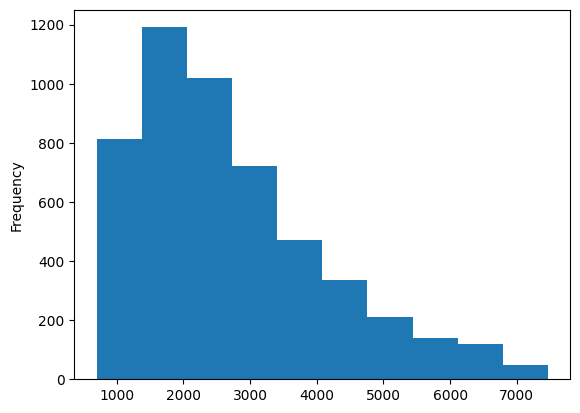

In [56]:
df['Time'].plot.hist();

Plot the average response time for each stimulus category (matching and non-matching)

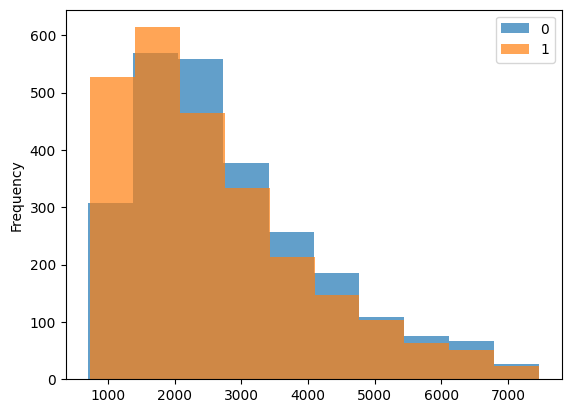

In [66]:
df.groupby('Matching').Time.plot.hist(legend=True, alpha=0.7);

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

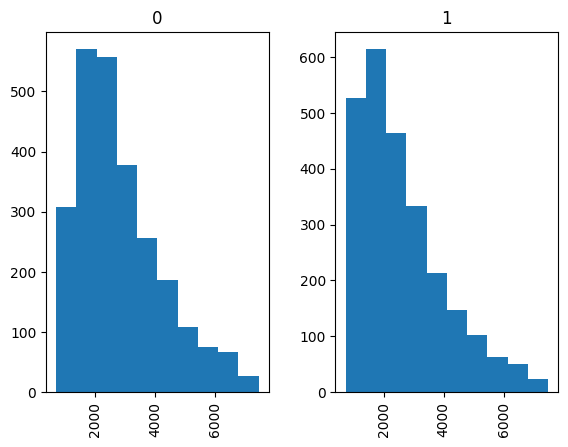

In [60]:
df.hist('Time', by='Matching')

Is there a correlation between Angle of mental rotation and response time?  Visualize the relationship using a scatter plot

<Axes: xlabel='Angle', ylabel='Time'>

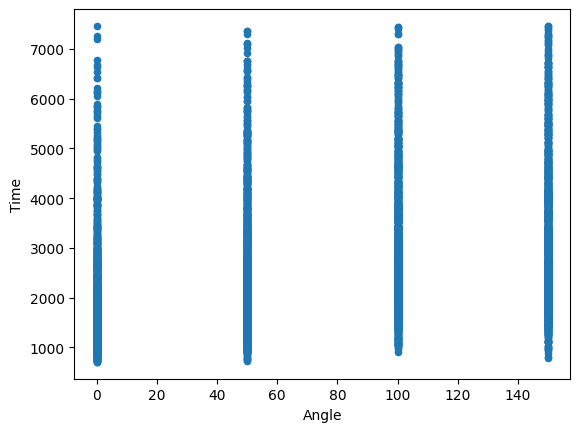

In [70]:
df.plot.scatter(x='Angle', y='Time')

Is there a relationship between subject age and average response time?   Visualize the relationship using a box plot

<Axes: title={'center': 'Time'}, xlabel='Age'>

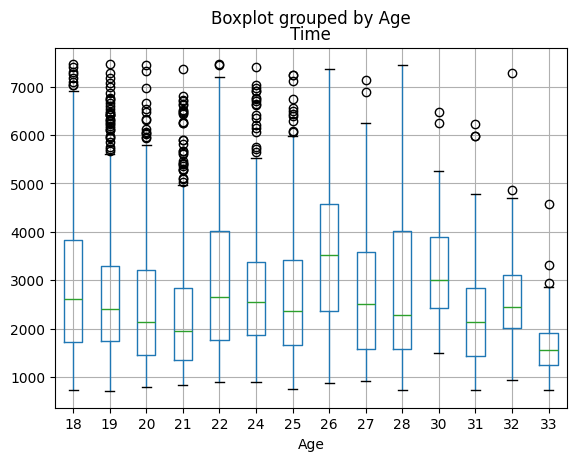

In [83]:
df.boxplot(column='Time', by='Age')

Did participants get faster or slower as they did more trials? Visualize the relationship using a scatter plot

<Axes: xlabel='Trial', ylabel='Time'>

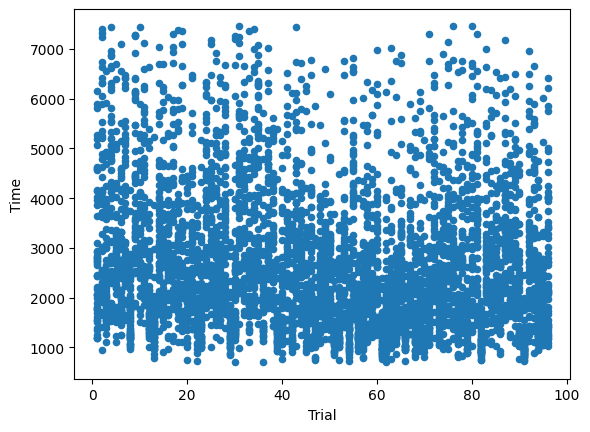

In [84]:
df.plot.scatter(x='Trial', y = 'Time')

Plot the response time distribution, with a seperate subplot for each subject.

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>,
        <Axes: title={'center': '21'}>],
       [<Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
        <Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>,
        <Axes: title={'center': '26'}>, <Axes: title={'center': '27'}>,
        <Axes: title={

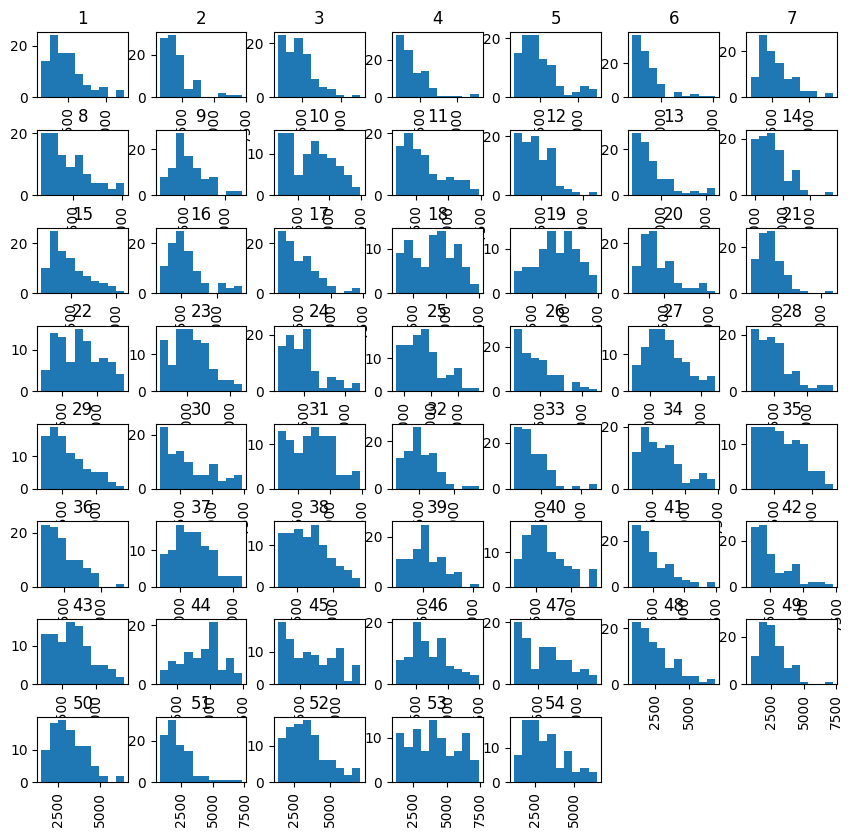

In [88]:
df.hist('Time', by = 'Subject', figsize = (10,10))

## Plotting with Seaborn

| Syntax |
| :-- |
| `sns.catplot(data=df, x='Col1', y='Col2', hue='Col3', kind='bar')` |
| `sns.lineplot(data=df, x='Col1', y='Col2', hue='Col3')` |
| `sns.lmplot(data=df, x='Col1', y='Col2', hue='Col3')` |

Is there a difference between average response time for matching and non-matching trials?

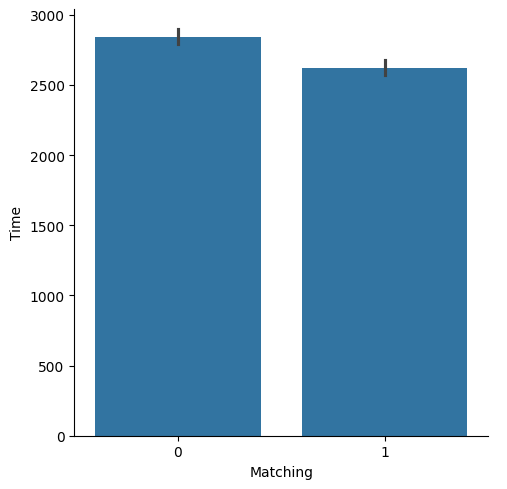

In [90]:
sns.catplot(data=df, x = 'Matching', y = 'Time', kind='bar')

Is there a correlation between Angle of mental rotation and response time?  Visualize the relationship

Is there a difference in the relationship between Angle of mental rotation and response time, between stimulus categories?

Is there a difference in the relationship between Angle of mental rotation and response time for participants younger than 22 and participants older than 22, between stimulus categories?

Did participants get faster or slower as they did more trials? Visualize the relationship using a line plot